# Example Notebook for use of CosMomentum to configure FLASK simulations (Xavier et al 2016, https://arxiv.org/abs/1602.08503), e.g. for the purpose of covariance estimation of PDF based cosmological statistics

In [1]:
# loading required packages
import ctypes
import sys
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# compiling and loading c++ library
os.system("cd cpp_code; make DSS")
lib=ctypes.CDLL("./cpp_code/DSS.so")

In [3]:
# initialising a new universe and its matter content
a_initial = 0.000025
a_final = 1.0

initialise_new_Universe = lib.initialise_new_Universe
# initialise_new_Universe          (double a_initial,  double a_final,  double Omega_m,  double Omega_b,  double Omega_r,  double Omega_L,  double sigma_8,      double n_s,    double h_100,       double w0,       double w1)
initialise_new_Universe.argtypes = [ ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double]
initialise_new_Universe.restype = None

# Cosmology of Quijote sims
Omfid = 0.3175
Obfid = 0.049
hfid = 0.6711
nsfid = 0.9624
sig8fid = 0.834

# Cosmology of DEUS sims
Omfid = 0.2573
Obfid = 0.04356 
hfid = 0.7200
nsfid = 0.9630
sig8fid = 0.8010

# Cosmology of Takahashi++17 sims
Omfid = 0.279
Obfid = 0.279-0.233
hfid = 0.7
nsfid = 0.97
sig8fid = 0.82

# Cosmology of Buzzard sims
Omfid = 0.286
Obfid = 0.047
hfid = 0.7
nsfid = 0.96
sig8fid = 0.82
f_NL = 0.0

density_sample_1 = 69.47036304452095/(np.pi*30.0**2)
b1_sample_1 = 1.8
b2_sample_1 = 0.0
a0 = 1.26
a1 = 0.28

z = 1.0 # everywhere in this notebook

initialise_new_Universe(a_initial, a_final, Omfid, Obfid, 0.0, 1.0-Omfid, sig8fid, nsfid, hfid, -1.0, 0.0)

In [4]:



add_projected_galaxy_sample = lib.add_projected_galaxy_sample
# add_projected_galaxy_sample          (int index_of_universe, const char *n_of_z_file, double density_in_Mpc_over_h_cubed,        double b1,        double b2,       double a0,       double a1)
add_projected_galaxy_sample.argtypes = [         ctypes.c_int,         ctypes.c_char_p,                    ctypes.c_double,  ctypes.c_double,  ctypes.c_double, ctypes.c_double, ctypes.c_double]
add_projected_galaxy_sample.restype = None


return_N_max_projected = lib.return_N_max_projected
# int return_N_max_projected      (int index_of_galaxy_sample, double R_in_Mpc_over_h, double var_NL_rescale)
return_N_max_projected.argtypes = [              ctypes.c_int,        ctypes.c_double,       ctypes.c_double]
return_N_max_projected.restype = ctypes.c_int


change_parameters_of_projected_galaxy_sample = lib.change_parameters_of_projected_galaxy_sample
# change_parameters_of_projected_galaxy_sample          (int index_of_galaxy_sample,        double z, double density_in_Mpc_over_h_cubed,        double b1,        double b2,       double a0,       double a1)
change_parameters_of_projected_galaxy_sample.argtypes = [              ctypes.c_int, ctypes.c_double,                    ctypes.c_double,  ctypes.c_double,  ctypes.c_double, ctypes.c_double, ctypes.c_double]
change_parameters_of_projected_galaxy_sample.restype = None

change_b2_to_minimise_negative_densities_projected = lib.change_b2_to_minimise_negative_densities_projected
# change_b2_to_minimise_negative_densities_projected          (int index_of_galaxy_sample, double R_in_Mpc_over_h, double var_NL_rescale)
change_b2_to_minimise_negative_densities_projected.argtypes = [              ctypes.c_int,        ctypes.c_double,       ctypes.c_double]
change_b2_to_minimise_negative_densities_projected.restype = ctypes.c_double


In [5]:
# Creating first galaxy sample (lenses)
#n_of_z_file_str = 'Data/redshift_distributions/pofz_Y1_redMaGiC_bin4.dat'
n_of_z_file_str = 'Data/redshift_distributions/nofz_LRG_NGC.dat'
n_of_z_file = ctypes.c_char_p(n_of_z_file_str.encode('utf-8'))
add_projected_galaxy_sample(0, n_of_z_file, density_sample_1, b1_sample_1, b2_sample_1, a0, a1)

In [6]:
# Creating second galaxy sample (sources)
#n_of_z_file_str = 'Data/redshift_distributions/mcal_0.90_1.30_pz.tab'
n_of_z_file_str = 'Data/redshift_distributions/nofz_single_redshift.dat'
n_of_z_file = ctypes.c_char_p(n_of_z_file_str.encode('utf-8'))
add_projected_galaxy_sample(0, n_of_z_file, density_sample_1, b1_sample_1, b2_sample_1, a0, a1)

In [7]:

return_R_in_Mpc_over_h_from_angular_scale = lib.return_R_in_Mpc_over_h_from_angular_scale
# return_R_in_Mpc_over_h_from_angular_scale          (int index_of_galaxy_sample, double theta_in_arcmin)
return_R_in_Mpc_over_h_from_angular_scale.argtypes = [              ctypes.c_int,        ctypes.c_double]
return_R_in_Mpc_over_h_from_angular_scale.restype = ctypes.c_double

theta = 30.0
R_2D = return_R_in_Mpc_over_h_from_angular_scale(0, theta)
print(R_2D)

16.54534274907785


In [8]:

configure_FLASK_for_delta_g_and_kappa = lib.configure_FLASK_for_delta_g_and_kappa
# configure_FLASK_for_delta_g_and_kappa          (   int l_max, double theta_in_arcmin,     double bias,        double r, int index_of_lens_sample, int index_of_source_sample, const char *n_of_z_file)
configure_FLASK_for_delta_g_and_kappa.argtypes = [ctypes.c_int,        ctypes.c_double, ctypes.c_double, ctypes.c_double,             ctypes.c_int,               ctypes.c_int,         ctypes.c_char_p]
configure_FLASK_for_delta_g_and_kappa.restype = None

In [9]:
l_max = 10000
theta_in_arcmin = 30.0
bias = 2.0
r = 0.95
index_of_lens_sample = 0
index_of_source_sample = 1

output_file_str = 'FLASK_config.tab'
output_file = ctypes.c_char_p(output_file_str.encode('utf-8'))
configure_FLASK_for_delta_g_and_kappa(l_max, theta_in_arcmin, bias, r, index_of_lens_sample, index_of_source_sample, output_file)

In [10]:
Cell_data = np.loadtxt("FLASK_config.tab")
ell_values = Cell_data[2:,0]
Cell_values = Cell_data[2:,3] + Cell_data[2:,4]
Cell_values_2 = Cell_data[2:,1]

3.2489149000000005e-08


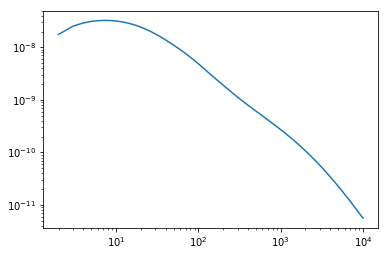

In [11]:
print(np.max(Cell_values))
plt.loglog(ell_values, Cell_values)
#plt.loglog(ell_values, ell_values*Cell_values_2, linestyle='dashed')
#9.985472e-08

In [12]:
return_lognormal_shift_for_individual_FLASK_bin = lib.return_lognormal_shift_for_individual_FLASK_bin
# return_lognormal_shift_for_individual_FLASK_bin          (double theta_in_arcmin, int index_of_galaxy_sample, int sources0_or_lenses1)
return_lognormal_shift_for_individual_FLASK_bin.argtypes = [       ctypes.c_double,               ctypes.c_int,            ctypes.c_int]
return_lognormal_shift_for_individual_FLASK_bin.restype = ctypes.c_double

In [14]:
# Creating second galaxy sample (sources)
n_of_z_file_str = 'Data/redshift_distributions/mcal_0.90_1.30_pz.tab'
n_of_z_file = ctypes.c_char_p(n_of_z_file_str.encode('utf-8'))
add_projected_galaxy_sample(0, n_of_z_file, density_sample_1, b1_sample_1, b2_sample_1, a0, a1)

In [15]:
theta_in_arcmin = 10.0
shift_for_lenses = return_lognormal_shift_for_individual_FLASK_bin(theta_in_arcmin, 0, 1)
shift_for_sources = return_lognormal_shift_for_individual_FLASK_bin(theta_in_arcmin, 2, 0)
print(shift_for_lenses, shift_for_sources)

0.6312426574043428 0.03015627310918608
